In [1]:
# 12 Listing 6.1
import numpy as np

samples = ["The cat sat on the mat.", "The dog ate my homework."]

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
            
max_length = 10

results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.0


In [16]:
# 12 Listing 6.2
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50

results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1


In [17]:
# 12 Listing 6.3
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 9 unique tokens.


In [18]:
# 12 Listing 6.4
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1


In [19]:
# 12 Listing 6.5
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)


In [20]:
# 12 Listing 6.6
from keras.datasets import imdb
from keras import preprocessing


max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


In [21]:
# 12 Listing 6.7
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_2 (Flatten)         (None, 160)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 40us/sample - loss: 0.6765 - acc: 0.6072 - val_loss: 0.6358 - val_acc: 0.6876
Epoch 2/10
20000/20000 [==============================] - 1s 34us/sample - loss: 0.5574 - acc: 0.7469 - val_loss: 0.5351 - val_acc: 0.7270
Epoch 3/10
20000/20000 [==============================] - 1s 29us/sample - loss: 0.4661 - acc: 0.7871 - val_loss: 0.5051 - val_acc: 0.7442
Epoch 4/10
20000/20000 [==============================] - 1s 32us/sample - loss: 0.4221 - acc: 0.8108 - val_loss: 0.4938 - val_acc: 0.7520
Epoch 5/10
20000/20000 [==============================] - 1s 33us/sample - loss: 0.3928 - acc: 0.8255 - val_loss: 0.4956 - val_acc: 0.7508
Epoch 6/10
20000/20000 [==============================] - 1s 31us/sample - loss: 0.3696 - acc: 0.8385 - val_loss: 0.5007 - val_acc: 0.7512
Epoch 7/10
20000/20000 [==============================] - 1s 32us/sample - loss: 0.3496 - acc: 0.8490 - val_loss: 0.5

In [23]:
# 12 Listing 6.8
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')


labels = []
texts = []


for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


In [24]:
# 12 Listing 6.9
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))


data = pad_sequences(sequences, maxlen=maxlen)


labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)


indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [25]:
# 12 Listing 6.10
glove_dir = 'glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [26]:
# 12 Listing 6.11
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [27]:
# 12 Listing 6.12
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                320032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# 12 Listing 6.13
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


In [29]:
# 12 Listing 6.14
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(
    x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val)
)
model.save_weights("pre_trained_glove_model.h5")


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/sample - loss: 2.0439 - acc: 0.5350 - val_loss: 2.2018 - val_acc: 0.5006
Epoch 2/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.6766 - acc: 0.7350 - val_loss: 0.7613 - val_acc: 0.5220
Epoch 3/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.4590 - acc: 0.7750 - val_loss: 2.2831 - val_acc: 0.5006
Epoch 4/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.4648 - acc: 0.8200 - val_loss: 1.3313 - val_acc: 0.5005
Epoch 5/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.1529 - acc: 0.9650 - val_loss: 0.7884 - val_acc: 0.5325
Epoch 6/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.1248 - acc: 0.9900 - val_loss: 1.0230 - val_acc: 0.5114
Epoch 7/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.0859 - acc: 0.9900 - val_loss: 1.2313 - val_acc: 0.5029
Epoch 8/10
200

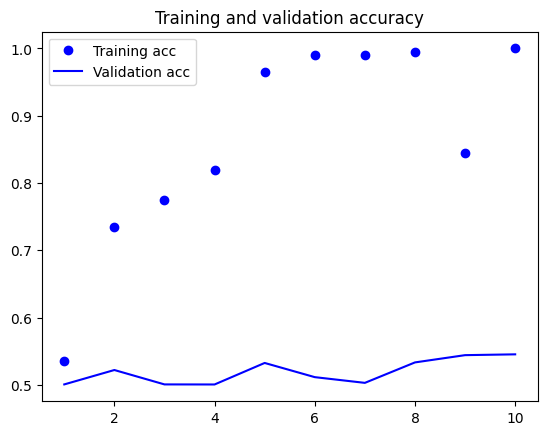

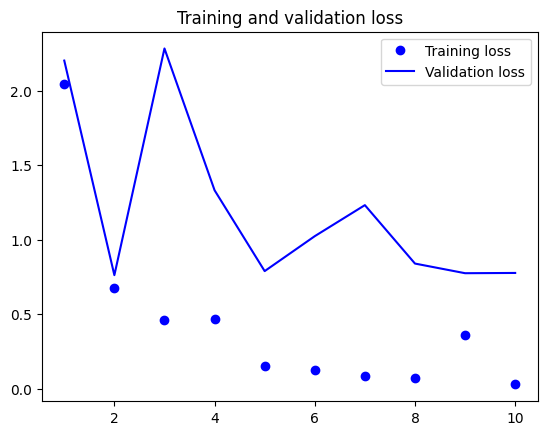

In [30]:
# 12 Listing 6.15
import matplotlib.pyplot as plt


acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]


epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [31]:
# 12 Listing 6.16
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                320032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

history = model.fit(
    x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val)
)


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.6933 - acc: 0.5800 - val_loss: 0.6930 - val_acc: 0.5067
Epoch 2/10
200/200 [==============================] - 1s 3ms/sample - loss: 0.4915 - acc: 0.9550 - val_loss: 0.7129 - val_acc: 0.5054
Epoch 3/10
200/200 [==============================] - 1s 6ms/sample - loss: 0.2828 - acc: 0.9800 - val_loss: 0.7673 - val_acc: 0.5022
Epoch 4/10
200/200 [==============================] - 1s 3ms/sample - loss: 0.1355 - acc: 1.0000 - val_loss: 0.7251 - val_acc: 0.5158
Epoch 5/10
200/200 [==============================] - 1s 3ms/sample - loss: 0.0628 - acc: 1.0000 - val_loss: 0.7514 - val_acc: 0.5111
Epoch 6/10
200/200 [==============================] - 1s 3ms/sample - loss: 0.0325 - acc: 1.0000 - val_loss: 0.7654 - val_acc: 0.5112
Epoch 7/10
200/200 [==============================] - 1s 3ms/sample - loss: 0.0179 - acc: 1.0000 - val_loss: 0.7622 - val_acc: 0.5167
Epoch 8/10
200

In [33]:
# 12 Listing 6.17   
test_dir = os.path.join(imdb_dir, 'test')


labels = []
texts = []


for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [34]:
# 12 Listing 6.18
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)


[0.7693260782432556, 0.5548]

In [35]:
# 12 Listing 6.19 Giả mã RNN
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t


NameError: name 'input_sequence' is not defined

In [ ]:
# 12 Listing 6.20
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t


In [36]:
# 12 Listing 6.21
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)


output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)


In [37]:
# 12 Listing 6.22
from keras.datasets import imdb
from keras.preprocessing import sequence


max_features = 10000
maxlen = 500
batch_size = 32


print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")


print("Pad sequences (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [38]:
# 12 Listing 6.23
from keras.layers import Dense
from keras.layers import SimpleRNN


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(
    input_train, y_train, epochs=10, batch_size=128, validation_split=0.2
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 737us/sample - loss: 0.6276 - acc: 0.6318 - val_loss: 0.5152 - val_acc: 0.7584
Epoch 2/10
20000/20000 [==============================] - 13s 663us/sample - loss: 0.4037 - acc: 0.8292 - val_loss: 0.4391 - val_acc: 0.8016
Epoch 3/10
20000/20000 [==============================] - 19s 929us/sample - loss: 0.2999 - acc: 0.8781 - val_loss: 0.3672 - val_acc: 0.8480
Epoch 4/10
20000/20000 [==============================] - 18s 913us/sample - loss: 0.2392 - acc: 0.9104 - val_loss: 0.3944 - val_acc: 0.8262
Epoch 5/10
20000/20000 [==============================] - 15s 747us/sample - loss: 0.1862 - acc: 0.9300 - val_loss: 0.3754 - val_acc: 0.8666
Epoch 6/10
20000/20000 [==============================] - 14s 722us/sample - loss: 0.1345 - acc: 0.9524 - val_loss: 0.5088 - val_acc: 0.7912
Epoch 7/10
20000/20000 [==============================] - 15s 749us/sample - loss: 0.0883 - acc: 0.9702 -

In [ ]:
# 12 Listing 6.24

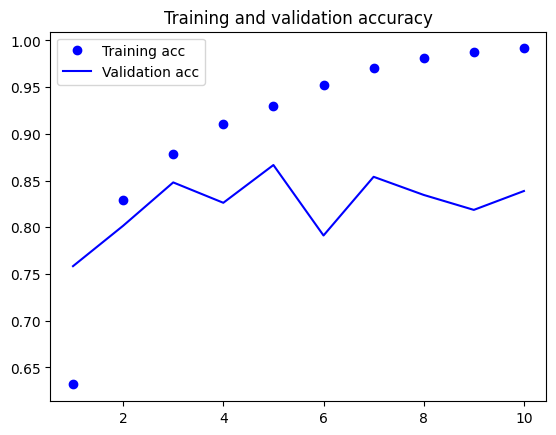

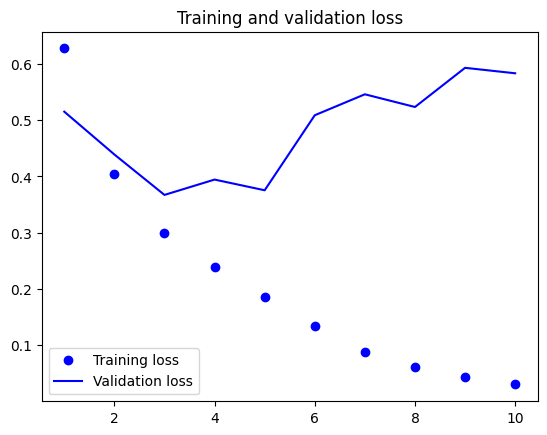

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# 12 Listing 6.25
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)


i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)



In [ ]:
# 12 Listing 6.26
c_t+1 = i_t * k_t + c_t * f_t

In [40]:
# 12 Listing 6.27
from keras.layers import LSTM


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])


history = model.fit(
    input_train, y_train, epochs=10, batch_size=128, validation_split=0.2
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 42s 2ms/sample - loss: 0.5377 - acc: 0.7410 - val_loss: 0.4129 - val_acc: 0.8418
Epoch 2/10
20000/20000 [==============================] - 41s 2ms/sample - loss: 0.2996 - acc: 0.8827 - val_loss: 0.2983 - val_acc: 0.8830
Epoch 3/10
20000/20000 [==============================] - 40s 2ms/sample - loss: 0.2396 - acc: 0.9104 - val_loss: 0.2771 - val_acc: 0.8890
Epoch 4/10
20000/20000 [==============================] - 42s 2ms/sample - loss: 0.2015 - acc: 0.9259 - val_loss: 0.3900 - val_acc: 0.8774
Epoch 5/10
20000/20000 [==============================] - 41s 2ms/sample - loss: 0.1777 - acc: 0.9348 - val_loss: 0.4538 - val_acc: 0.8636
Epoch 6/10
20000/20000 [==============================] - 41s 2ms/sample - loss: 0.1615 - acc: 0.9431 - val_loss: 0.5681 - val_acc: 0.8364
Epoch 7/10
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.1490 - acc: 0.9468 - val_loss: 0.3

In [1]:
# 12 Listing 6.28
import os


data_dir = 'mpi_saale_2021b'
fname = os.path.join(data_dir, 'mpi_saale_2021b.csv')


f = open(fname)
data = f.read()
f.close()


lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]


print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"rh (%)"', '"sh (g/kg)"', '"Tpot (K)"', '"Tdew (degC)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"wd (deg)"', '"rain (mm)"', '"SWDR (W/m**2)"', '"SDUR (s)"', '"TRAD (degC)"', '"Rn (W/m**2)"', '"ST002 (degC)"', '"ST004 (degC)"', '"ST008 (degC)"', '"ST016 (degC)"', '"ST032 (degC)"', '"ST064 (degC)"', '"ST128 (degC)"', '"SM008 (%)"', '"SM016 (%)"', '"SM032 (%)"', '"SM064 (%)"', '"SM128 (%)"']


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"rh (%)"', '"sh (g/kg)"', '"Tpot (K)"', '"Tdew (degC)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"wd (deg)"', '"rain (mm)"', '"SWDR (W/m**2)"', '"SDUR (s)"', '"TRAD (degC)"', '"Rn (W/m**2)"', '"ST002 (degC)"', '"ST004 (degC)"', '"ST008 (degC)"', '"ST016 (degC)"', '"ST032 (degC)"', '"ST064 (degC)"', '"ST128 (degC)"', '"SM008 (%)"', '"SM016 (%)"', '"SM032 (%)"', '"SM064 (%)"', '"SM128 (%)"']
26497


['"Date Time"',
 '"p (mbar)"',
 '"T (degC)"',
 '"rh (%)"',
 '"sh (g/kg)"',
 '"Tpot (K)"',
 '"Tdew (degC)"',
 '"VPmax (mbar)"',
 '"VPact (mbar)"',
 '"VPdef (mbar)"',
 '"H2OC (mmol/mol)"',
 '"rho (g/m**3)"',
 '"wv (m/s)"',
 '"wd (deg)"',
 '"rain (mm)"',
 '"SWDR (W/m**2)"',
 '"SDUR (s)"',
 '"TRAD (degC)"',
 '"Rn (W/m**2)"',
 '"ST002 (degC)"',
 '"ST004 (degC)"',
 '"ST008 (degC)"',
 '"ST016 (degC)"',
 '"ST032 (degC)"',
 '"ST064 (degC)"',
 '"ST128 (degC)"',
 '"SM008 (%)"',
 '"SM016 (%)"',
 '"SM032 (%)"',
 '"SM064 (%)"',
 '"SM128 (%)"']

In [2]:
# 12 Listing 6.29
import numpy as np


float_data = np.zeros((len(lines), len(header) - 1))


for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values


ValueError: could not broadcast input array from shape (0,) into shape (30,)

In [3]:
# 12 Listing 6.30
from matplotlib import pyplot as plt


temp = float_data[:, 1] <1> temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)


SyntaxError: invalid syntax (3809311420.py, line 5)

In [4]:
# 12 Listing 6.31
plt.plot(range(1440), temp[:1440])

NameError: name 'plt' is not defined

In [5]:
# 12 Listing 6.32
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std


In [6]:
# 12 Listing 6.33
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
            min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets


In [7]:
# 12 Listing 6.34
lookback = 1440
step = 6
delay = 144
batch_size = 128


train_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step,
    batch_size=batch_size,
)

val_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size,
)

test_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=300001,
    max_index=None,
    step=step,
    batch_size=batch_size,
)

val_steps = 300000 - 200001 - lookback

test_steps = len(float_data) - 300001 - lookback


In [8]:
# 12 Listing 6.35
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()



IndexError: index 200001 is out of bounds for axis 0 with size 26497

In [9]:
# 12 Listing 6.36
celsius_mae = 0.29 * std[1]



In [10]:
# 12 Listing 6.37
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop



model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1))



model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps,
)


C:\Users\01655\AppData\Local\Temp\ipykernel_21704\1437216611.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


IndexError: index 187633 is out of bounds for axis 0 with size 26497

In [11]:
# 12 Listing 6.38
import matplotlib.pyplot as plt


loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()


plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [12]:
# 12 Listing 6.39
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))


model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps,
)


C:\Users\01655\AppData\Local\Temp\ipykernel_21704\825687776.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


StopIteration: 

In [13]:
# 12 Listing 6.40
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(
    layers.GRU(
        32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, float_data.shape[-1])
    )
)
model.add(layers.Dense(1))



model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=40,
    validation_data=val_gen,
    validation_steps=val_steps,
)



C:\Users\01655\AppData\Local\Temp\ipykernel_21704\2370818112.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


StopIteration: 

In [14]:
# 12 Listing 6.41
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(
    layers.GRU(
        32,
        dropout=0.1,
        recurrent_dropout=0.5,
        return_sequences=True,
        input_shape=(None, float_data.shape[-1]),
    )
)
model.add(layers.GRU(64, activation="relu", dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))


model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=40,
    validation_data=val_gen,
    validation_steps=val_steps,
)


C:\Users\01655\AppData\Local\Temp\ipykernel_21704\3063935358.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


StopIteration: 

In [15]:
# 12 Listing 6.42
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential


max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]



x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)



model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation="sigmoid"))



model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 58s 351ms/step - loss: 0.6161 - acc: 0.6388 - val_loss: 0.4629 - val_acc: 0.7932
Epoch 2/10
157/157 [==============================] - 58s 372ms/step - loss: 0.3994 - acc: 0.8358 - val_loss: 0.4073 - val_acc: 0.8572
Epoch 3/10
157/157 [==============================] - 49s 315ms/step - loss: 0.3226 - acc: 0.8768 - val_loss: 0.3378 - val_acc: 0.8674
Epoch 4/10
157/157 [==============================] - 46s 295ms/step - loss: 0.2932 - acc: 0.8939 - val_loss: 0.3376 - val_acc: 0.8784
Epoch 5/10
157/157 [==============================] - 46s 294ms/step - loss: 0.2428 - acc: 0.9135 - val_loss: 0.3533 - val_acc: 0.8634
Epoch 6/10
157/157 [==============================] - 47s 298ms/step - loss: 0.2227 - acc: 0.9209 - val_loss: 0.3491 - val_acc: 0.8652
Epoch 7/10
157/157 [==============================] - 46s 296ms/step - loss: 0.1979 - acc: 0.9318 - val_loss: 0.3978 - val_acc: 0.8622
Epoch 8/10
157/157 [==============================] - 4

In [16]:
# 12 Listing 6.43
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 61s 373ms/step - loss: 0.6682 - acc: 0.5781 - val_loss: 0.5727 - val_acc: 0.7310
Epoch 2/10
157/157 [==============================] - 57s 362ms/step - loss: 0.4500 - acc: 0.8055 - val_loss: 0.3743 - val_acc: 0.8498
Epoch 3/10
157/157 [==============================] - 54s 343ms/step - loss: 0.3181 - acc: 0.8767 - val_loss: 1.0091 - val_acc: 0.6206
Epoch 4/10
157/157 [==============================] - 53s 338ms/step - loss: 0.2719 - acc: 0.8989 - val_loss: 0.4278 - val_acc: 0.8446
Epoch 5/10
157/157 [==============================] - 54s 342ms/step - loss: 0.2355 - acc: 0.9140 - val_loss: 0.3336 - val_acc: 0.8608
Epoch 6/10
157/157 [==============================] - 53s 337ms/step - loss: 0.2086 - acc: 0.9272 - val_loss: 0.3156 - val_acc: 0.8828
Epoch 7/10
157/157 [==============================] - 52s 334ms/step - loss: 0.1879 - acc: 0.9337 - val_loss: 0.3801 - val_acc: 0.8710
Epoch 8/10
157/157 [==============================] - 5

In [17]:
# 12 Listing 6.44
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(
    layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1]))
)
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=40,
    validation_data=val_gen,
    validation_steps=val_steps,
)


C:\Users\01655\AppData\Local\Temp\ipykernel_21704\3977660543.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


StopIteration: 

In [ ]:
# 12 Listing 6.45
from keras.datasets import imdb
from keras.preprocessing import sequence


max_features = 10000
max_len = 500

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), "train sequences")
print(len(x_test), "test sequences")
print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


In [ ]:
# 12 Listing 6.46
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation="relu"))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()


In [ ]:
model.compile(optimizer=RMSprop(lr=1e-4), loss="binary_crossentropy", metrics=["acc"])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


In [ ]:
# 12 Listing 6.47
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(
    layers.Conv1D(32, 5, activation="relu", input_shape=(None, float_data.shape[-1]))
)
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation="relu"))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))


model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps,
)


In [ ]:
# 12 Listing 6.48
step = 3
lookback = 720
delay = 144

train_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step,
)

val_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
)

test_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=300001,
    max_index=None,
    step=step,
)

val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)


In [ ]:
# 12 Listing 6.49
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(
    layers.Conv1D(32, 5, activation="relu", input_shape=(None, float_data.shape[-1]))
)
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation="relu"))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()


model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps,
)
